In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.sa_algo import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_sa_pcoloring(size, file_name="test.pdf", out_size=(250,250)):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    p_col1 = sa_algorithm(prob, 1000, 100, 0.85, 100)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = np.floor(i/size)*2
        pos[v][1] = (i%size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using RLF

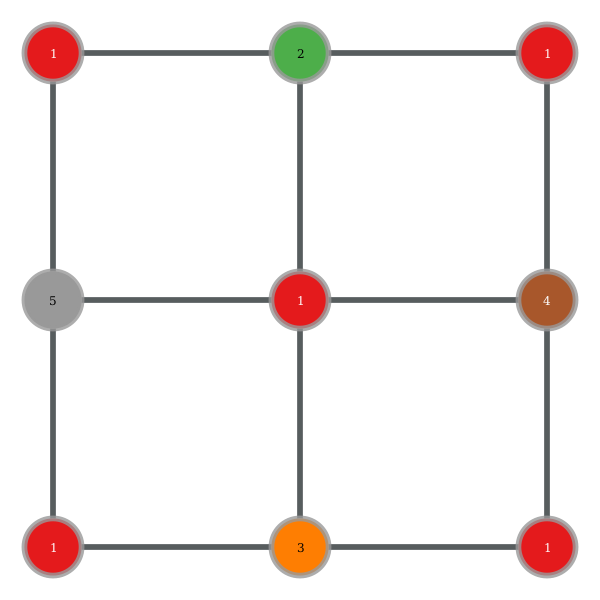

5
[1 5 1 2 1 3 1 4 1]


In [3]:
square_grid_sa_pcoloring(3, file_name="../Report/Pictures/SA_G3-3.pdf", out_size=(105, 150))

# Packing coloration of 24x24 grid using RLF

In [4]:
square_grid_sa_pcoloring(24, file_name="../Report/Pictures/SA_G24-24.pdf", out_size=(500, 500))

KeyboardInterrupt: 